<a href="https://colab.research.google.com/github/gjkprr/QAM_demodulator/blob/main/qam_demodulator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
M = 4  # Order of QAM (e.g., 16-QAM)
symbol_rate = 10 # Symbols per second
sample_rate = 100 # Samples per second
time = 10  # Signal duration in seconds

In [26]:
# Generate random symbols# Generate random symbols
num_symbols = int(symbol_rate * time)
symbols = np.random.randint(0, M, num_symbols)  # Random indices for QAM symbols

print(num_symbols)
print(symbols)
I_vals = 2 * (np.arange(np.sqrt(M)) - (np.sqrt(M) - 1) / 2)
Q_vals = 2 * (np.arange(np.sqrt(M)) - (np.sqrt(M) - 1) / 2)
print(I_vals)
print(Q_vals)

100
[2 2 3 3 0 2 3 3 0 2 3 3 0 0 0 3 1 1 2 2 2 0 2 3 0 1 1 0 1 3 3 0 1 3 2 1 1
 1 2 2 1 2 1 0 2 1 3 0 0 2 0 1 0 2 3 0 1 0 3 0 2 2 3 3 2 3 1 0 3 1 3 1 1 3
 0 3 3 1 3 2 0 2 3 1 3 3 2 3 0 2 3 2 3 2 3 2 3 3 2 2]
[-1.  1.]
[-1.  1.]


In [27]:
# Map symbols to QAM_values
constellation = np.array([[i + 1j * q for q in Q_vals] for i in I_vals]).flatten()

modulated_signal = constellation[symbols]
print(constellation)
print(modulated_signal)

[-1.-1.j -1.+1.j  1.-1.j  1.+1.j]
[ 1.-1.j  1.-1.j  1.+1.j  1.+1.j -1.-1.j  1.-1.j  1.+1.j  1.+1.j -1.-1.j
  1.-1.j  1.+1.j  1.+1.j -1.-1.j -1.-1.j -1.-1.j  1.+1.j -1.+1.j -1.+1.j
  1.-1.j  1.-1.j  1.-1.j -1.-1.j  1.-1.j  1.+1.j -1.-1.j -1.+1.j -1.+1.j
 -1.-1.j -1.+1.j  1.+1.j  1.+1.j -1.-1.j -1.+1.j  1.+1.j  1.-1.j -1.+1.j
 -1.+1.j -1.+1.j  1.-1.j  1.-1.j -1.+1.j  1.-1.j -1.+1.j -1.-1.j  1.-1.j
 -1.+1.j  1.+1.j -1.-1.j -1.-1.j  1.-1.j -1.-1.j -1.+1.j -1.-1.j  1.-1.j
  1.+1.j -1.-1.j -1.+1.j -1.-1.j  1.+1.j -1.-1.j  1.-1.j  1.-1.j  1.+1.j
  1.+1.j  1.-1.j  1.+1.j -1.+1.j -1.-1.j  1.+1.j -1.+1.j  1.+1.j -1.+1.j
 -1.+1.j  1.+1.j -1.-1.j  1.+1.j  1.+1.j -1.+1.j  1.+1.j  1.-1.j -1.-1.j
  1.-1.j  1.+1.j -1.+1.j  1.+1.j  1.+1.j  1.-1.j  1.+1.j -1.-1.j  1.-1.j
  1.+1.j  1.-1.j  1.+1.j  1.-1.j  1.+1.j  1.-1.j  1.+1.j  1.+1.j  1.-1.j
  1.-1.j]


In [28]:
# Generate time-domain waveform
samples_per_symbol = int(sample_rate / symbol_rate)
t = np.arange(num_symbols * samples_per_symbol) / sample_rate
carrier_I = np.real(modulated_signal.repeat(samples_per_symbol))  # I'm not sure about this
carrier_Q = np.imag(modulated_signal.repeat(samples_per_symbol))
carrier_waveform = carrier_I * np.cos(2 * np.pi * symbol_rate * t) - carrier_Q * np.sin(2 * np.pi * symbol_rate * t)

In [29]:
# Add noise
SNR_dB = 50  # Signal-to-noise ratio in dB
SNR = 10 ** (SNR_dB / 10)
noise_power = np.var(carrier_waveform) / SNR
noise = np.sqrt(noise_power) * np.random.randn(len(carrier_waveform))
received_signal = carrier_waveform + noise

In [30]:
# Demodulation
received_I = received_signal * np.cos(2 * np.pi * symbol_rate * t)
received_Q = -received_signal * np.sin(2 * np.pi * symbol_rate * t)
# Symbol detection
received_constellation = received_I + 1j * received_Q
print(received_constellation)

[ 1.00006015+0.00000000e+00j  1.12649336-8.18445335e-01j
  0.38856446-1.19587845e+00j -0.19828215-6.10249709e-01j
  0.18097385+1.31485200e-01j  1.00288043+1.22817431e-16j
  1.13145265-8.22048470e-01j  0.38862836-1.19607511e+00j
 -0.19859632-6.11216611e-01j  0.17892492+1.29996567e-01j
  1.00089635+2.45148903e-16j  1.12665058-8.18559559e-01j
  0.3889273 -1.19699515e+00j -0.19803008-6.09473928e-01j
  0.17455323+1.26820344e-01j  0.99725597+3.66385900e-16j
  1.12935555-8.20524837e-01j  0.38854223-1.19581002e+00j
 -0.19912184-6.12834008e-01j  0.17998283+1.30765181e-01j
  0.99600722+4.87902823e-16j  0.18033171-1.31018657e-01j
 -0.19892787+6.12237030e-01j  0.38917733+1.19776465e+00j
  1.12583579+8.17967581e-01j  1.00304195+6.14186054e-16j
  0.1782129 -1.29479251e-01j -0.200543  +6.17207874e-01j
  0.38990846+1.20001486e+00j  1.12664007+8.18551927e-01j
  1.00401496+7.37738223e-16j  0.17995429-1.30744447e-01j
 -0.19720313+6.06928816e-01j  0.38888174+1.19685493e+00j
  1.12625411+8.18271509e-01j  1

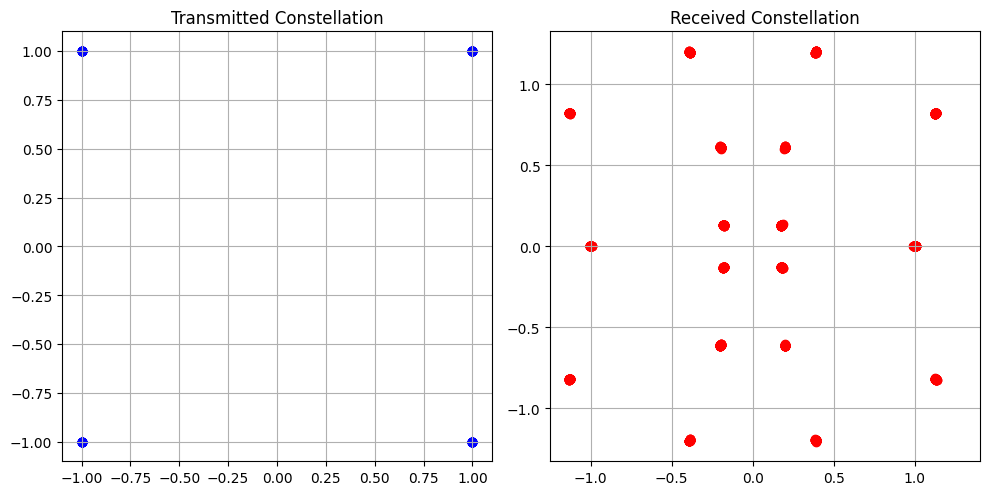

In [31]:
# Plot constellation
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Transmitted Constellation")
plt.scatter(np.real(modulated_signal), np.imag(modulated_signal), color='blue', label='Transmitted')
plt.grid(True)
plt.axis('square')

plt.subplot(1, 2, 2)
plt.title("Received Constellation")
plt.scatter(np.real(received_constellation), np.imag(received_constellation), color='red', label='Received')
plt.grid(True)
plt.axis('square')
plt.tight_layout()
plt.show()
